<a href="https://colab.research.google.com/github/vishnuvmullapudi/LinkedIn-Job-Salary-Prediction/blob/main/Group_9_Additional_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADDITIONAL MODELS

## Importing the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/cleaned_data.csv")

In [ ]:
data

,job_title,salary,pay_period,work_type,location,experience_level,sponsored,currency,skills,company_name,company_size,category_ComplexOnsiteApply,category_OffsiteApply,category_SimpleOnsiteApply
0,Sales Manager,88336.222112,2,1,"Santa Clarita, CA",5,0,USD,"SALE, BD",CargoLogin.,1.0,1,0,0
1,Model Risk Auditor,88336.222112,3,0,"New York, NY",5,0,USD,"ACCT, FIN",Employvision Inc.,1.0,1,0,0
2,NY Studio Assistant,88336.222112,2,1,"New York, NY",5,1,USD,"DSGN, ART, IT",Ken Fulk Inc,1.0,1,0,0
3,Office Associate,42000.000000,2,1,"Albany, GA",5,1,USD,ADM,Sunnyland Farms,2.0,1,0,0
4,Education Manager,88336.222112,2,1,United States,5,0,USD,"EDU, TRNG",Paradigm Senior Services,2.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14338,Sanitation Technician,88336.222112,1,4,"West Columbia, SC",2,0,USD,"ENG, IT",Aspire Bakeries,5.0,0,1,0
14339,Unit Secretary,88336.222112,2,1,"Teaneck, NJ",2,0,USD,ADM,Holy Name Medical Center,5.0,0,1,0
14340,"Radiology Aide, Perdiem",88336.222112,1,4,"Teaneck, NJ",2,0,USD,HCPR,Holy Name Medical Center,5.0,0,1,0
14341,MRI Manager,135000.000000,2,1,"New York, NY",5,0,USD,OTHR,Columbia University Irving Medical Center,7.0,0,1,0


In [ ]:
df = data[['salary','pay_period','work_type','experience_level','sponsored','company_size','category_ComplexOnsiteApply','category_OffsiteApply','category_SimpleOnsiteApply']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14343 entries, 0 to 14342
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   salary                       14343 non-null  float64
 1   pay_period                   14343 non-null  int64  
 2   work_type                    14343 non-null  int64  
 3   experience_level             14343 non-null  int64  
 4   sponsored                    14343 non-null  int64  
 5   company_size                 14343 non-null  float64
 6   category_ComplexOnsiteApply  14343 non-null  int64  
 7   category_OffsiteApply        14343 non-null  int64  
 8   category_SimpleOnsiteApply   14343 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1008.6 KB


## Below 3 features "experience_level", "pay_period", and "work_type" are choosen as independent variables and "salary" is choosen as our target variable or dependent variable

In [ ]:
X = df[['experience_level','pay_period','work_type']] # Feature
y = df['salary']                                      # Target Variable

## Split the data into training, validation and testing sets using sklearn train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

## With the help of sklearn train_test_split we splitted the dataset into two parst train set and test set. So, total 14343 rows are splitted into three sets where 11474 in train set, 1434 rows into validation set and remaining 1435 in test set.

In [ ]:
X_train.shape

(11474, 3)

In [ ]:
X_val.shape

(1434, 3)

In [ ]:
X_test.shape

(1435, 3)

In [ ]:
y_train.shape

(11474,)

## Scaling the data

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.transform(X_test)

In [ ]:
y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = scaler.transform(y_val.values.reshape(-1, 1))
y_test = scaler.transform(y_test.values.reshape(-1, 1))

## Scaling is done using StandardScaler which is z-score. Scaling is one of the important process in Ml applications to perform so that the model has higher acccuracy.

In [ ]:
X_train

array([[ 0.77935155, -0.03795617, -0.13485794],
       [ 0.77935155, -0.03795617, -0.13485794],
       [ 0.77935155, -0.03795617, -0.13485794],
       ...,
       [ 0.77935155, -0.03795617, -0.13485794],
       [ 0.77935155, -0.03795617, -0.13485794],
       [-0.90026522, -0.03795617, -0.13485794]])

In [ ]:
X_val

array([[ 0.72847308, -0.04287203, -0.14191681],
       [ 0.72847308, -2.23853257,  3.21262237],
       [-0.98966902, -0.04287203, -0.14191681],
       ...,
       [-2.13509708, -2.23853257,  3.21262237],
       [-2.13509708, -0.04287203, -0.14191681],
       [ 0.72847308, -0.04287203, -0.14191681]])

In [ ]:
X_test

array([[ 0.72847308, -0.04287203, -0.14191681],
       [ 0.72847308, -0.04287203, -0.14191681],
       [-2.13509708, -0.04287203, -0.14191681],
       ...,
       [ 0.72847308,  2.1527885 , -1.26009654],
       [ 0.72847308, -0.04287203, -0.14191681],
       [ 0.72847308, -0.04287203, -0.14191681]])

In [ ]:
y_train

array([[-0.01236833],
       [-0.01236833],
       [-0.01236833],
       ...,
       [-0.01236833],
       [ 0.93892532],
       [-0.01236833]])

In [ ]:
y_val

array([[ 3.00119977],
       [-0.01236833],
       [-0.01236833],
       ...,
       [-0.01236833],
       [-0.11062506],
       [ 0.97943428]])

In [ ]:
y_test

array([[-0.01236833],
       [-0.01236833],
       [ 1.04305011],
       ...,
       [-0.01236833],
       [-0.01236833],
       [-0.01236833]])

# XGBoost
## XGBoost is an ensemble learning technique that generates a final prediction that is both robust and accurate by combining the predictions of several weak models, usually decision trees.
##XGBoost is a flexible machine learning model that excels at both classification and regression tasks and is well-known for its strong handling of missing data and resistance to outliers

### References:
###https://xgboost.readthedocs.io/en/stable/python/python_intro.html
###https://arxiv.org/abs/1603.02754

In [ ]:
# Importing the XGBRegressor from xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Creating the model
xgb_model = XGBRegressor(objective='reg:squarederror',
                      colsample_bytree=0.3,
                      learning_rate=0.1,
                      max_depth=5,
                      alpha=10,
                      n_estimators=100,
                      random_state=42)

# Training the model which is called fitting
xgb_model.fit(X_train, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
# predicting on the test set
y_pred_xgb = xgb_model.predict(X_test)

In [ ]:
#Mean Squared Error and R^2 Score values
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("MSE for XGBoost:", mse_xgb)

r2_xgb = r2_score(y_test, y_pred_xgb)
print("R^2 Score for XGBoost:", r2_xgb)

MSE for XGBoost: 1.1026548089454695
R^2 Score for XGBoost: -0.2958400350749928


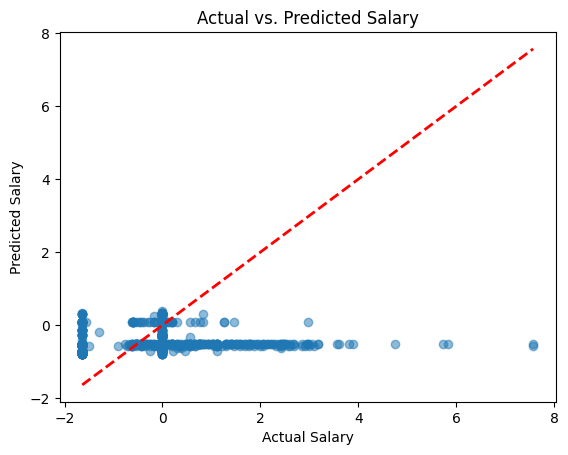

In [ ]:
#plot
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

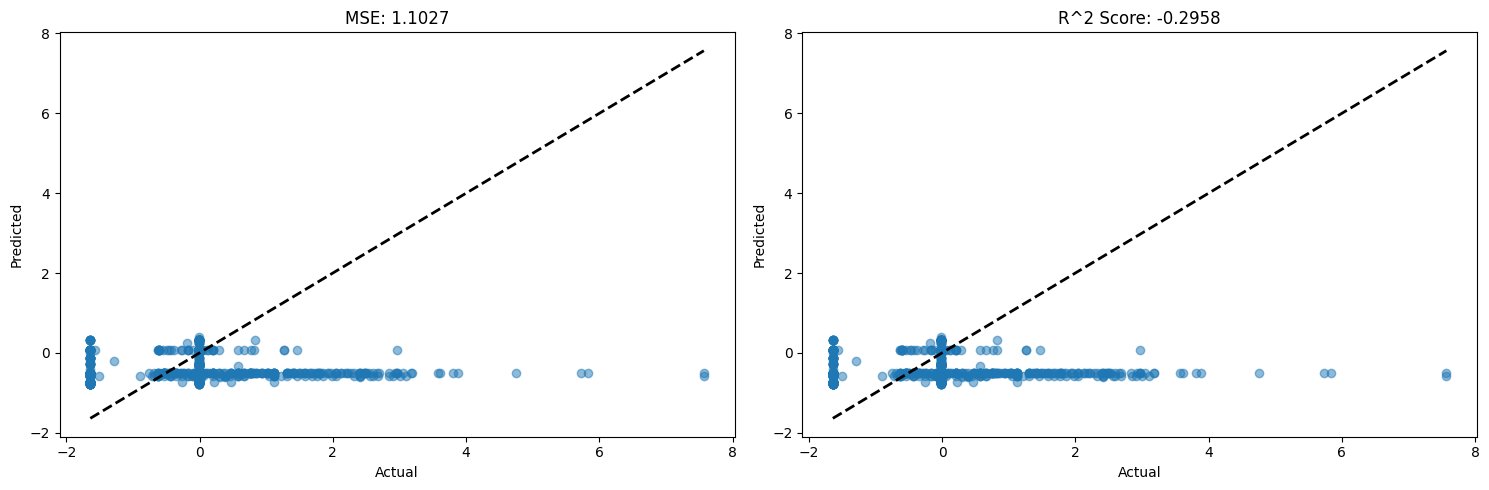

In [ ]:
# Plotting the evaluation metrics using plt library
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred_xgb, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_xgb:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred_xgb, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_xgb:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Extreme Machine Learning Model (ELM)
## One class of models based on neural networks are Extreme Learning Machines. Unlike conventional neural networks, they have a single hidden layer and fixed, randomly assigned weights between the input and hidden layer. ELMs are renowned for being easy to use and having quick training periods.

### References
### https://www.sciencedirect.com/science/article/pii/S1877050916310157
### https://github.com/diogocampospy/pyrenn

In [ ]:
#Importing MLPRegressor from sklearn neural networks
from sklearn.neural_network import MLPRegressor

In [ ]:
#Creating the model
elm_model = MLPRegressor(hidden_layer_sizes=(10,),activation='logistic',max_iter=1000,random_state=42)

#Training the model
elm_model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10,), max_iter=1000,
             random_state=42)

In [ ]:
#Predicting on test set
y_pred_elm = elm_model.predict(X_test)

In [ ]:
#Mean Squared Error and R^2 Score values
mse_elm = mean_squared_error(y_test, y_pred_elm)
print("MSE for XGBoost:", mse_elm)

r2_elm = r2_score(y_test, y_pred_elm)
print("R^2 Score for XGBoost:", r2_elm)

MSE for XGBoost: 0.784694782579755
R^2 Score for XGBoost: 0.07782661778460531


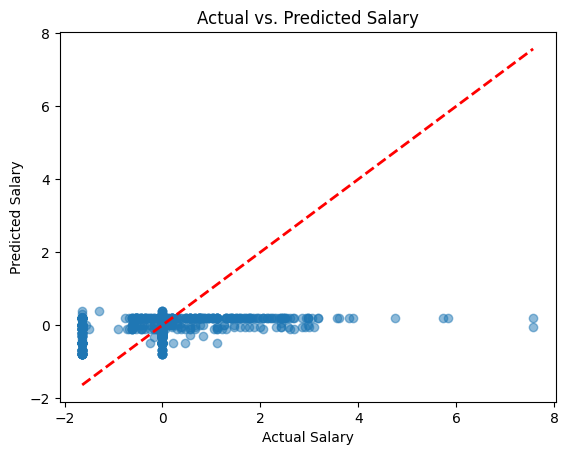

In [ ]:
#plot
plt.scatter(y_test, y_pred_elm, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary')
plt.show()

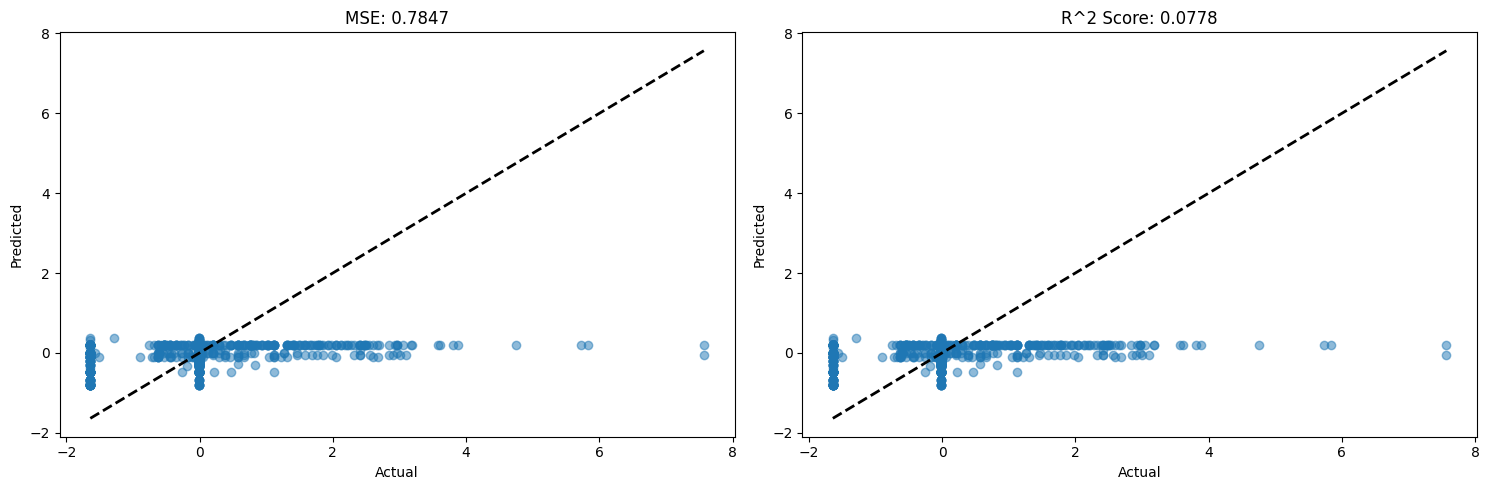

In [ ]:
# Plotting the evaluation metrics using plt library
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred_elm, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_elm:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred_elm, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_elm:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Basic Deep Learning Model with Two Layers
## An input layer, a hidden layer, and an output layer make up the two layers of a basic neural network architecture represented by this model. Despite being straightforward, it can identify non-linear relationships in the data. Important design decisions that affect the model's performance are the quantity of neurons in the hidden layer and the activation functions that are employed.

### Refrences
### https://www.tensorflow.org/tutorials
### https://www.deeplearningbook.org/

In [ ]:
# Importing the Sequential and Dense models from tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
#Creating the model
model = Sequential()

#Adding the two layers to the model
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=1, activation='linear'))

In [ ]:
# Compiling the model using adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9593 - val_loss: 0.7803
Epoch 2/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9406 - val_loss: 0.7827
Epoch 3/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9397 - val_loss: 0.7779
Epoch 4/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9388 - val_loss: 0.7760
Epoch 5/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9381 - val_loss: 0.7722
Epoch 6/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9377 - val_loss: 0.7713
Epoch 7/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9372 - val_loss: 0.7731
Epoch 8/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9365 - val_loss: 0.7707
Epoch 9/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9366 - val_loss: 0.7743
Epoch 10/50
359/359 [==============================] - 1s 2ms/step - loss: 0.9355 - val_loss: 0.7819

In [ ]:
# Make predictions on the test data
y_pred_deep = model.predict(X_test)

45/45 [==============================] - 0s 1ms/step


In [ ]:
#Mean Squared Error and R^2 Score values
mse_deep = mean_squared_error(y_test, y_pred_deep)
print(f'Mean Squared Error: {mse_deep}')

r2_deep = r2_score(y_test, y_pred_deep)
print(f'R^2 Score: {r2_deep}')

Mean Squared Error: 0.7566598483452304
R^2 Score: 0.11077327513110047


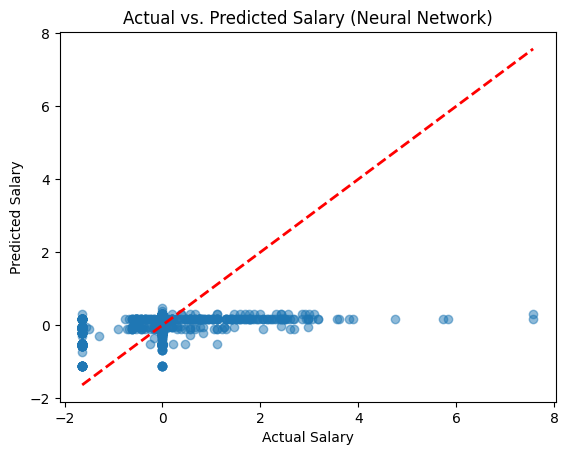

In [ ]:
#plot
plt.scatter(y_test, y_pred_deep, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary (Neural Network)')
plt.show()

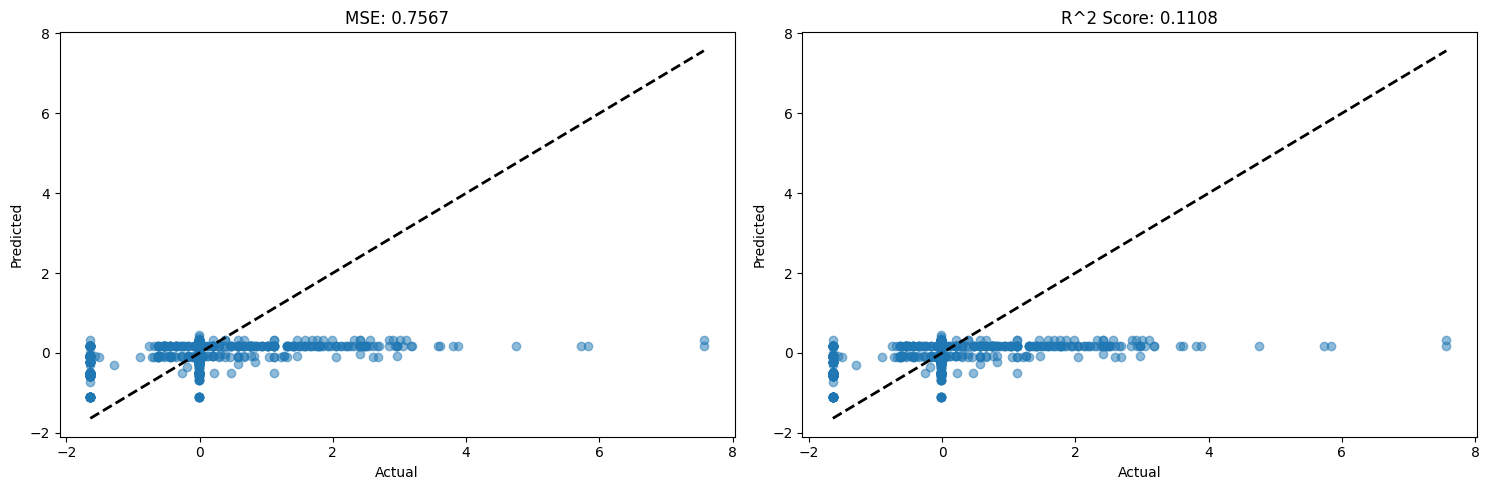

In [ ]:
# Plotting the evaluation metrics using plt library
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred_deep, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_deep:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred_deep, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_deep:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

# Ensemble model containing top 3 models overall
## To capitalize on the advantages of each individual model, this ensemble model combines the predictions of the top three models (Random Forest, Gradient Boosting, and Deep Learning). By combining various predictions, ensemble methods frequently lead to better generalization performance and robustness.

## The top 3 models overall are Random Forest, Gradient Boosting, and ELM

In [ ]:
#Importing the RandomForestRegressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

# Creating the model
random_forest_model = RandomForestRegressor(bootstrap = True, max_depth = 20, min_samples_leaf = 4, min_samples_split = 10, n_estimators = 50, random_state=42)

# Training the model which is called fitting
random_forest_model.fit(X_train, y_train)

<ipython-input-62-4782e544905c>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=50, random_state=42)

In [ ]:
# predicting on the test set
y_pred_rf = random_forest_model.predict(X_test)

In [ ]:
#Importing the ensemble GradientBoostingRegressor from sklearn library
from sklearn.ensemble import GradientBoostingRegressor

# Creating the model
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Training the model which is called fitting
gradient_boosting_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [ ]:
# Predicting on the test set
y_pred_gradient_boosting = gradient_boosting_model.predict(X_test)

In [ ]:
#Importing the KNeighborsRegressor from sklearn library
from sklearn.neighbors import KNeighborsRegressor

# Creating the model
knn_model = KNeighborsRegressor(n_neighbors=31)

# Training the model which is called fitting
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=31)

In [ ]:
y_pred_knn = knn_model.predict(X_test)

## Now, lets create the ensemble model using the top 3 models of the project. Using Voting Regressor we can predict the accurate salary.

In [ ]:
#Importing VotingRegressor from sklearn ensemble library
from sklearn.ensemble import VotingRegressor

# Creating the ensembel model with top 3 models
ensemble_model = VotingRegressor(estimators=[
    ('rf', random_forest_model),
    ('gb', gradient_boosting_model),
    ('knn', knn_model)
])

In [ ]:
#Traing the model
ensemble_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingRegressor(estimators=[('rf',
                             RandomForestRegressor(max_depth=20,
                                                   min_samples_leaf=4,
                                                   min_samples_split=10,
                                                   n_estimators=50,
                                                   random_state=42)),
                            ('gb', GradientBoostingRegressor(random_state=42)),
                            ('knn', KNeighborsRegressor(n_neighbors=31))])

In [ ]:
#Predicting on the test set
y_pred_ensemble = ensemble_model.predict(X_test)

In [ ]:
#Mean Squared Error and R^2 Score values
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
print("MSE for Ensemble Model:", mse_ensemble)

r2_ensemble = r2_score(y_test, y_pred_ensemble)
print("R^2 Score for Ensemble Model:", r2_ensemble)

MSE for Ensemble Model: 0.7442662294554042
R^2 Score for Ensemble Model: 0.125338257214893


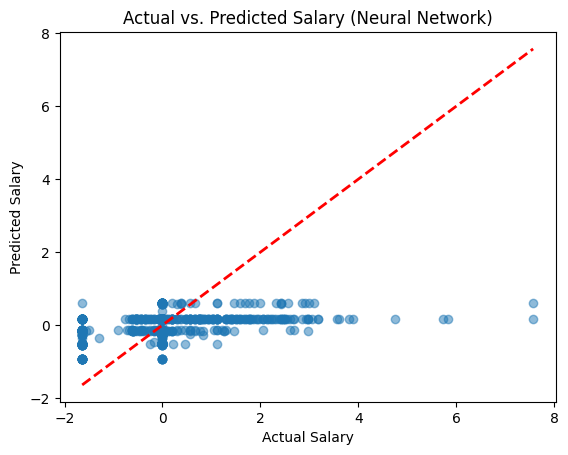

In [ ]:
#plot
plt.scatter(y_test, y_pred_ensemble, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Actual vs. Predicted Salary (Neural Network)')
plt.show()

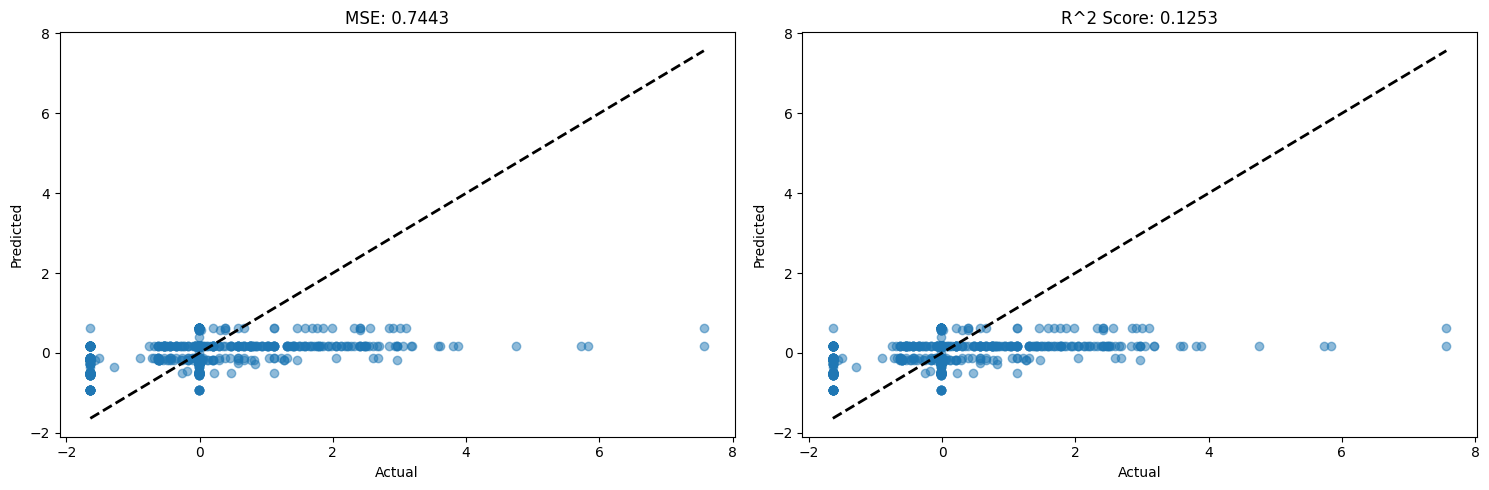

In [ ]:
# Plotting the evaluation metrics using plt library
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Mean Squared Error (MSE)
axs[0].scatter(y_test, y_pred_ensemble, alpha=0.5)
axs[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[0].set_title(f'MSE: {mse_ensemble:.4f}')
axs[0].set_xlabel('Actual')
axs[0].set_ylabel('Predicted')

# R^2 Score
axs[1].scatter(y_test, y_pred_ensemble, alpha=0.5)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_title(f'R^2 Score: {r2_ensemble:.4f}')
axs[1].set_xlabel('Actual')
axs[1].set_ylabel('Predicted')

plt.tight_layout()
plt.show()

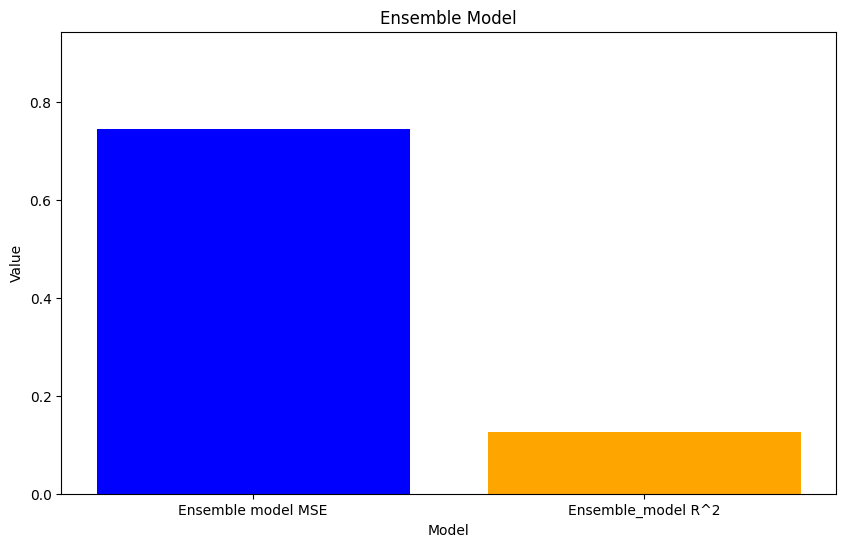

In [ ]:
#List of all the models we have created
model= ['Ensemble model MSE','Ensemble_model R^2']
values = [mse_ensemble,r2_ensemble]

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(model, values, color=['blue', 'orange'])
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Ensemble Model')
plt.ylim(0, max(values) + 0.2)
plt.show()

### Using ensemble model we got the best performance over our data. The MSE value obtained from ensemble is 0.7443 which is less than any other model but not that less compared to our top three models. This completly depends upon the selection perspective of the users in selecting best hyperparameters, selecting best models, etc..